In [1]:
import numpy as np
import matplotlib.pyplot as plt


中英文字体支持


In [2]:
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['Arial']     # For better label display
plt.rcParams['axes.unicode_minus'] = False      # 用来正常显示负号


In [3]:
def load_data():
    """
    Load training data
    Returns: Arrays of house area (1000 sq ft) and price (1000 dollars)
    """
    x_train = np.array([1.0, 2.0, 3.0, 4.0])         # House area
    y_train = np.array([300.0, 500.0, 700.0, 900.0]) # House price
    return x_train, y_train


In [4]:
def print_data_info(x_train, y_train):
    """
    Print dataset information
    """
    print(f"Dataset shape: x_train.shape = {x_train.shape}")
    print(f"Number of training examples: {x_train.shape[0]}")
    print("\nTraining data:")
    for i in range(len(x_train)):
        print(f"    Sample {i}: Area={x_train[i]}k sq ft, Price={y_train[i]}k dollars")


In [5]:
def plot_data(x_train, y_train, title = "House Price Data"):
    """
    Plot training data scatter plot
    """
    plt.figure(figsize = (8, 6))
    plt.scatter(x_train, y_train, marker = "x", c = "red", s = 100, label = "Actual Data")
    plt.title(title, fontsize = 14)
    plt.ylabel("Price (k dollars)", fontsize = 12)
    plt.xlabel("Area (k sq ft)", fontsize = 12)
    plt.grid(True, alpha = 0.3)
    plt.legend()
    plt.show()

In [6]:
def linear_model(x, w, b):
    """
    Linear regression model: f(x) = wx + b
    
    Parameters:
        x: Input feature (house area)
        w: Weight parameter (slope)
        b: Bias parameter (intercept)
    
    Returns:
        Predicted values
    """
    return w * x + b

In [7]:
def compute_predictions(x_train, w, b):
    """
    Compute predictions for all training samples
    
    Parameters:
        x_train: Training features
        w, b: Model parameters
    
    Returns:
        Array of predicted values
    """
    return linear_model(x_train, w, b)

In [8]:
def plot_model_comparison(x_train, y_train, w, b):
    """
    Plot comparison between model predictions and actual data
    """
    y_pred = compute_predictions(x_train, w, b)

    x_smooth = np.linspace(x_train.min() - 0.5, x_train.max() + 0.5, 100)
    y_smooth = linear_model(x_smooth, w, b)

    plt.figure(figsize = (10, 6))

    # Plot prediction line
    plt.plot(x_smooth, y_smooth, "b-", linewidth = 2, label = f"Prediction Line (w={w}, b={b})")

    # Plot actual data points
    plt.scatter(x_train, y_train, marker = "x", c = "red", s = 100, label = "Actual Data")

    # Plot prediction points
    plt.scatter(x_train, y_pred, marker = "o", c = "blue", s = 80, label = "Predictions")

    # Add error lines
    for i in range(len(x_train)):
        plt.vlines(x_train[i], y_train[i], y_pred[i], colors = "gray", linestyles = "--", alpha = 0.5)

    plt.title("Linear Regression Model Predictions", fontsize = 14)
    plt.ylabel("Price (k dollars)", fontsize = 12)
    plt.xlabel("Area (k sq ft)", fontsize = 12)
    plt.grid(True, alpha = 0.3)
    plt.legend()
    plt.show()

    return y_pred


Cost function:
```math
J(w,b) = \frac{1}{2n}\sum_{i=1}^{n}\left(f(x^{(i)}) - y^{(i)}\right)^2
```

In [9]:
def calculate_cost(y_true, y_pred):
    """
    Calculate Mean Squared Error (MSE) cost function
    """
    m = len(y_true)
    cost = np.sum((y_true - y_pred) ** 2) / (2 * m)
    return cost


In [10]:
def main():
    """
    Main function: Demonstrate basic concepts of linear regression
    """
    print("=== Machine Learning Linear Regression Example ===\n")

    # 1. Load data
    print("1. Loading training data...")
    x_train, y_train = load_data()
    print_data_info(x_train, y_train)

     # 2. Visualize data
    print("\n2. Visualizing training data...")
    plot_data(x_train, y_train)

    # 3. Define model parameters
    print("\n3. Setting model parameters...")
    w = 200  # Weight (slope)：200
    b = 200  # Bias (intercept)：100
    print(f"Model parameters: w = {w}, b = {b}")
    print(f"Linear model: f(x) = {w}x + {b}")

    # 4. Calculate predictions and visualize
    print("\n4. Calculating predictions and visualizing...")
    y_pred = plot_model_comparison(x_train, y_train, w, b)

    # 5. Calculate cost
    print("\n5. Calculating model cost...")
    cost = calculate_cost(y_train, y_pred)
    print(f"Mean Squared Error (MSE): {cost:.2f}")
    
    # 6. Display prediction results
    print("\n6. Prediction Results Comparison:")
    print("Area (k sq ft) | Actual Price (k $) | Predicted Price (k $) | Error")
    print("-" * 65)
    for i in range(len(x_train)):
        error = y_train[i] - y_pred[i]
        print(f"{x_train[i]:^14.1f} | {y_train[i]:^18.1f} | {y_pred[i]:^20.1f} | {error:^8.1f}")

    print(f"\nMean Absolute Error: {np.mean(np.abs(y_train - y_pred)):.1f} k dollars")
    print(f"Cost function value: {cost:.2f}")


=== Machine Learning Linear Regression Example ===

1. Loading training data...
Dataset shape: x_train.shape = (4,)
Number of training examples: 4

Training data:
    Sample 0: Area=1.0k sq ft, Price=300.0k dollars
    Sample 1: Area=2.0k sq ft, Price=500.0k dollars
    Sample 2: Area=3.0k sq ft, Price=700.0k dollars
    Sample 3: Area=4.0k sq ft, Price=900.0k dollars

2. Visualizing training data...


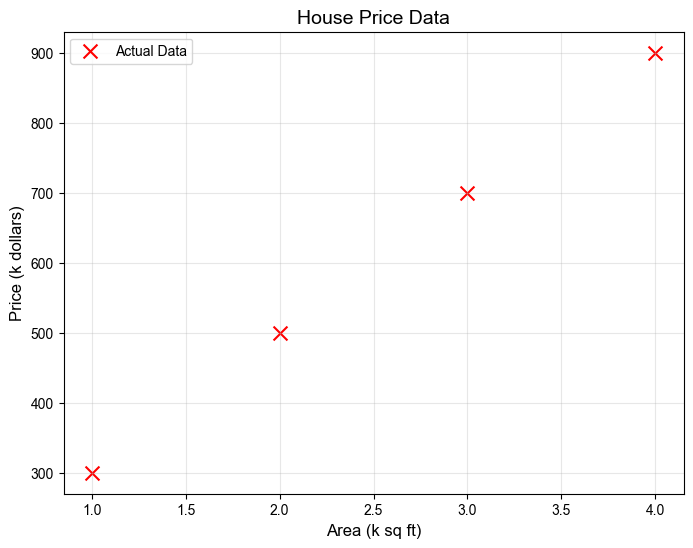


3. Setting model parameters...
Model parameters: w = 200, b = 200
Linear model: f(x) = 200x + 200

4. Calculating predictions and visualizing...


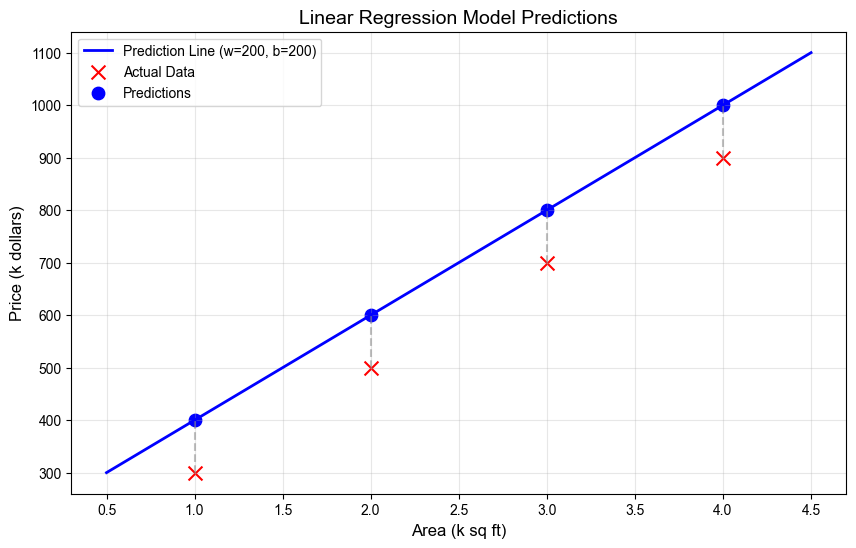


5. Calculating model cost...
Mean Squared Error (MSE): 5000.00

6. Prediction Results Comparison:
Area (k sq ft) | Actual Price (k $) | Predicted Price (k $) | Error
-----------------------------------------------------------------
     1.0       |       300.0        |        400.0         |  -100.0 
     2.0       |       500.0        |        600.0         |  -100.0 
     3.0       |       700.0        |        800.0         |  -100.0 
     4.0       |       900.0        |        1000.0        |  -100.0 

Mean Absolute Error: 100.0 k dollars
Cost function value: 5000.00


In [11]:
if __name__ == "__main__":
    main()